In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, mean_absolute_percentage_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import KFold
pd.set_option('display.max_rows', None)


# 1. Data Analyze


In [ ]:
df=pd.read_csv('/content/cleaned_data_dummies (1) (1).csv')
print(df.shape)
df.head()

(47560, 26)


,ViewYN,PoolPrivateYN,ClosePrice,Latitude,Longitude,LivingArea,CountyOrParish,AttachedGarageYN,ParkingTotal,BathroomsTotalInteger,...,LotSizeSquareFeet,SalesTaxRate,UnemploymentRate,MortgageRate30Fixed,FedInterestRate,CPI,Age,LotDensity,FlooringType,SchoolDistrict
0,1,0,890000.0,34.180411,-118.342020,1434.0,Los Angeles,0,1,1.0,...,6473.0,0.1050,4.1,6.72,4.48,315.605,85.0,4.513947,Unknown,District__Burbank Unified School District
1,0,0,1138000.0,32.574359,-117.023836,2872.0,San Diego,1,6,3.0,...,5219.0,0.0775,4.1,6.72,4.48,315.605,24.0,1.817201,Unknown,District__Unknown
2,1,0,681877.0,33.725080,-117.222302,2824.0,Riverside,1,2,3.0,...,7000.0,0.0875,4.1,6.72,4.48,315.605,1.0,2.478754,Unknown,District__Unknown
3,1,0,900000.0,34.203479,-118.643567,2500.0,Los Angeles,1,2,3.0,...,8336.0,0.0975,4.1,6.72,4.48,315.605,54.0,3.334400,Unknown,District__Los Angeles Unified School District
4,0,0,862000.0,34.460368,-118.490755,2363.0,Los Angeles,1,2,3.0,...,11705.0,0.0975,4.1,6.72,4.48,315.605,30.0,4.953449,Unknown,District__Unknown


Let's identify what data features we have.

In [ ]:
df.dtypes

,0
ViewYN,int64
PoolPrivateYN,int64
ClosePrice,float64
Latitude,float64
Longitude,float64
LivingArea,float64
CountyOrParish,object
AttachedGarageYN,int64
ParkingTotal,int64
BathroomsTotalInteger,float64


We can identify there are many encoding features of **District** and **Flooring**. We will reverse those features to identify any implicit and explicit missing values.

# 2. Data Cleaning

We will identify any missing values in this dataset.

In [ ]:
df.isna().sum()

,0
ViewYN,0
PoolPrivateYN,0
ClosePrice,0
Latitude,0
Longitude,0
LivingArea,0
CountyOrParish,0
AttachedGarageYN,0
ParkingTotal,0
BathroomsTotalInteger,0


In [ ]:
df = df.dropna()

df.isna().sum()

,0
ViewYN,0
PoolPrivateYN,0
ClosePrice,0
Latitude,0
Longitude,0
LivingArea,0
CountyOrParish,0
AttachedGarageYN,0
ParkingTotal,0
BathroomsTotalInteger,0


Due to data cleaning part of **Age** from Tara, we will drop that 11 explicit missing values.

In [ ]:
df["SchoolDistrict"].value_counts()

,count
SchoolDistrict,
District__Unknown,11309
District__Los Angeles Unified School District,4099
District__San Diego City Unified School District,1226
District__Capistrano Unified School District,995
District__Desert Sands Unified School District,963
District__Corona-Norco Unified School District,794
District__Palm Springs Unified School District,729
District__Riverside Unified School District,713
District__Hemet Unified School District,673


In [ ]:
#Take off "District_"
df["SchoolDistrict"] = df["SchoolDistrict"].str.replace("District__", '')

count_district=df["SchoolDistrict"].value_counts()
count_district

,count
SchoolDistrict,
Unknown,11309
Los Angeles Unified School District,4099
San Diego City Unified School District,1226
Capistrano Unified School District,995
Desert Sands Unified School District,963
Corona-Norco Unified School District,794
Palm Springs Unified School District,729
Riverside Unified School District,713
Hemet Unified School District,673


There are too many unique value in school district that would potentionally lead overfitting and noise for machine learning performance. We will group it into **Top Tier District**, **Mid Tier District**, **Low Tier District**, and **Rare District** without including Unknown.

In [ ]:
#call all unique values without "Unknown"
count_district = df[df["SchoolDistrict"] != "Unknown"]["SchoolDistrict"].value_counts()
count_district

#Threshold for grouping the unique values
top = count_district.quantile(0.9)
mid= count_district.quantile(0.7)
low= count_district.quantile(0.5)

#Call out the grouping names including threshold into 4 different groups
def categorize_district(district):
  if district == "Unknown":
    return "Unknown"

  count = count_district[district]
  if count >= top:
    return "Top Tier District"
  elif count >= mid:
    return "Mid Tier District"
  elif count >= low:
    return "Low Tier District"
  else:
    return "Rare District"

#Apply the function
df["SchoolDistrict"] = df["SchoolDistrict"].apply(categorize_district)

#Check
df["SchoolDistrict"].value_counts(normalize=True)

,proportion
SchoolDistrict,
Top Tier District,0.404740
Mid Tier District,0.241645
Unknown,0.237839
Low Tier District,0.082862
Rare District,0.032913


There are Unknown value, we will predict it using random forest classifier later on.

Similar reason on **City** comparing to **District**, we will break down the cities into 4 tiers of cities by quantiles.

In [ ]:
#call all unique values without "Unknown"
count_city = df["City"].value_counts()
count_city

#Threshold for grouping the unique values
top = count_city.quantile(0.75)
mid= count_city.quantile(0.5)
low= count_city.quantile(0.25)

#Call out the grouping names including threshold into 4 different groups
def categorize_city(city):
  if city == "Unknown":
    return "Unknown"

  count = count_city[city]
  if count >= top:
    return "Top Tier city"
  elif count >= mid:
    return "Mid Tier city"
  elif count >= low:
    return "Low Tier city"
  else:
    return "Rare city"

#Apply the function
df["City"] = df["City"].apply(categorize_city)

#Check
df["City"].value_counts(normalize=True)

,proportion
City,
Top Tier city,0.853772
Mid Tier city,0.069024
Low Tier city,0.040379
Rare city,0.036825


There is mostly top tier properties over 85 percent that has most frequently showing in the California property.

Let's check **CountyOrParish** variable whether it has managable unique values.



In [ ]:
count_county = df["CountyOrParish"].value_counts()
count_county

other_county = count_county[count_county<=50].index.tolist()
print(other_county)
df['CountyOrParish']=df['CountyOrParish'].replace(other_county, 'Others')
df["CountyOrParish"].value_counts()


['Monterey', 'Santa Cruz']


,count
CountyOrParish,
Los Angeles,11995
Riverside,8641
San Bernardino,5871
Orange,5149
San Diego,5096
Contra Costa,2314
Alameda,2127
Ventura,1704
Others,1138


There are less than 20 unique values and the Others value account for moderate rate in county variable. It is not necessary to divide into tiers what we did in city.


Let's check the **FlooringType** variable of unique values.

In [ ]:
df["FlooringType"].value_counts(normalize=True)

,proportion
FlooringType,
Unknown,0.370628
Carpet,0.300827
Laminate,0.105281
Tile,0.091758
Wood,0.052577
Vinyl,0.043155
SeeRemarks,0.016194
Stone,0.009001
Concrete,0.005784


There are implicit missing values in **Flooring Type** as Unknown. We will use Random Forest Classifier to predict the implicit missing values of **Flooring Type** and **School District**.

# 3. Random Forest Classifier

We will use random forest to predict the non-numerical value using the predictors of **ClosePrice, LivingArea, BathroomsTotalInteger, BathroomsTotalInteger, GarageSpaces, Longitude, Latitude**. We will track the patterns of flooring type using Random Forest Classifier to predict the unknown value.

In [ ]:
#Call out the copy for test and replace it to original data
df2 = df.copy()

#Call predictors for Flooring Type
predictors=["BedroomsTotal", "LivingArea", "BathroomsTotalInteger", "GarageSpaces", "Longitude", "Latitude", "Stories",
            "Age", "LotSizeSquareFeet", "LotDensity", "GarageSpaces", "ParkingTotal", "FireplaceYN", "NewConstructionYN"]

le = LabelEncoder()

#Change Unknown values into explicit missing value (Since we know there are no explicit missing values, it is okay to use it.)
df2["FlooringType"]= df2["FlooringType"].replace("Unknown", np.nan)

#Divide into no explicit missing values and missing values(Unknown).
known = df2[df2["FlooringType"].notna()]
unknown=df2[df2["FlooringType"].isna()]

#Change into numerical form
known["FlooringType"]=le.fit_transform(known["FlooringType"])


x_train,x_test,y_train,y_test=train_test_split(known[predictors], known["FlooringType"], test_size=0.2, random_state=42, stratify=known["FlooringType"])

#Randomforest perform predicting Flooring Type missing values using predictors of no explicit missing values of Flooring Type.
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)

#Predict the missing values of Flooring Type
predict_flooring=clf.predict(unknown[predictors])

#Reverse numerical into categorical feature.
predict_flooring_labels=le.inverse_transform(predict_flooring)

#Replace it in original data of Flooring Type of Unknown
df.loc[df["FlooringType"] == "Unknown", "FlooringType"]=predict_flooring_labels

#Check
accuracy,df["FlooringType"].value_counts()

/tmp/ipython-input-2935482803.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known["FlooringType"]=le.fit_transform(known["FlooringType"])


(0.47911794186435014,
 FlooringType
 Carpet        27669
 Laminate       7503
 Tile           5218
 Wood           3129
 Vinyl          2281
 SeeRemarks      802
 Stone           430
 Concrete        286
 Bamboo          188
 Brick            43
 Name: count, dtype: int64)

The test accuracy is 0.48 and it is decent because the baseline of Carpet floor type is bellow 0.48 from the above percentage distribution. We have predicted the Uknown value to other floor types by the patterns.

# 4. Random Forest Regressor

Let's do similar way with predicting school district of unknown value.

In [ ]:
predictors=["BedroomsTotal", "LivingArea", "BathroomsTotalInteger", "GarageSpaces", "Longitude", "Latitude", "Stories",
            "Age", "LotSizeSquareFeet", "LotDensity", "GarageSpaces", "ParkingTotal", "FireplaceYN", "NewConstructionYN"]

df2["SchoolDistrict"]= df2["SchoolDistrict"].replace("Unknown", np.nan)

known = df2[df2["SchoolDistrict"].notna()]
unknown=df2[df2["SchoolDistrict"].isna()]

known["SchoolDistrict"]=le.fit_transform(known["SchoolDistrict"])

x_train,x_test,y_train,y_test=train_test_split(known[predictors], known["SchoolDistrict"], test_size=0.2, random_state=42)

clf.fit(x_train, y_train)


y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)

predict_sd=clf.predict(unknown[predictors])
predict_sd_labels=le.inverse_transform(predict_sd)
df.loc[df["SchoolDistrict"] == "Unknown", "SchoolDistrict"]=predict_sd_labels

accuracy,df["SchoolDistrict"].value_counts()

/tmp/ipython-input-3175656186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known["SchoolDistrict"]=le.fit_transform(known["SchoolDistrict"])


(0.9169426048565121,
 SchoolDistrict
 Top Tier District    23374
 Mid Tier District    15395
 Low Tier District     6405
 Rare District         2375
 Name: count, dtype: int64)

We got higher accuracy of 0.92 predicting the unknown value in school district.

Now we will use random forest to predict the closed price. We will use dummies variables.

In [ ]:
df_dum = pd.get_dummies(df, drop_first=True)

for i in df_dum.columns:
  print(i)

ViewYN
PoolPrivateYN
ClosePrice
Latitude
Longitude
LivingArea
AttachedGarageYN
ParkingTotal
BathroomsTotalInteger
BedroomsTotal
FireplaceYN
Stories
NewConstructionYN
GarageSpaces
LotSizeSquareFeet
SalesTaxRate
UnemploymentRate
MortgageRate30Fixed
FedInterestRate
CPI
Age
LotDensity
CountyOrParish_Butte
CountyOrParish_Contra Costa
CountyOrParish_Kern
CountyOrParish_Lake
CountyOrParish_Los Angeles
CountyOrParish_Merced
CountyOrParish_Orange
CountyOrParish_Others
CountyOrParish_Riverside
CountyOrParish_San Bernardino
CountyOrParish_San Diego
CountyOrParish_San Joaquin
CountyOrParish_San Luis Obispo
CountyOrParish_San Mateo
CountyOrParish_Santa Barbara
CountyOrParish_Santa Clara
CountyOrParish_Solano
CountyOrParish_Ventura
City_Mid Tier city
City_Rare city
City_Top Tier city
FlooringType_Brick
FlooringType_Carpet
FlooringType_Concrete
FlooringType_Laminate
FlooringType_SeeRemarks
FlooringType_Stone
FlooringType_Tile
FlooringType_Vinyl
FlooringType_Wood
SchoolDistrict_Mid Tier District
Schoo

In [ ]:
y=df_dum['ClosePrice']
x=df_dum.drop('ClosePrice', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=50)


We will train Random Forest Regressor to predict the closed price, then evaluate performance on a holdout test set using Mean Absolute Error, R2 score, and Mean Absolute Percentage Error.

In [ ]:
#Call Random Forest
rfr=RandomForestRegressor(random_state=42, n_estimators=100)
rfr.fit(x_train, y_train)

y_pred=rfr.predict(x_test)


print("Train MAE:", mean_absolute_error(y_test, y_pred))
print("Train R2 score:", r2_score(y_test, y_pred))
print("Train MAPE:" , mean_absolute_percentage_error(y_test, y_pred)*100,"%")


Train MAE: 137595.21174538895
Train R2 score: 0.8644014097617589
Train MAPE: 12.202028887230517 %


We will tuned a Random Forest Regressor using Randomized Search CV with 5 fold cross-validation optimizing MAPE.

In [ ]:
# Call for hyper parameter tunning
param={
    'n_estimators': randint(100, 300),
    'max_depth':randint(1, 20),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 5)
}

In [ ]:
#Call MAPE score
mape_score = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

#Call K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Train and apply K-Fold to RandomSearch Cross-Validation with scoring MAPE
rfr_cv=RandomizedSearchCV(estimator=rfr, param_distributions=param, n_iter=15, cv=kf,scoring=mape_score, n_jobs=-1)
rfr_cv.fit(x_train, y_train)


all_mean_neg = rfr_cv.cv_results_['mean_test_score']
mean_mape = -np.mean(all_mean_neg)
std = np.std(all_mean_neg, ddof=1)


#Call the best parameter
best_param=rfr_cv.best_params_
print("Best Parameters", best_param)
print("Mean MAPE:", mean_mape)
print("Std:", std)


Best Parameters {'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 144}
Mean MAPE: 0.20196621486070726
Std: 0.0916744840821771


The best model used 185 trees, max depth 19, minimum samples split 6, and minimum samples leaf 3.


In [ ]:
#Apply the best parameter to Random Forest Regressor
final_model = rfr_cv.best_estimator_
final_model.fit(x_train, y_train)

#Call both train and test prediction to identify overfitting
y_pred_train = final_model.predict(x_train)
y_pred_test = final_model.predict(x_test)

print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Train R2 score:", r2_score(y_train, y_pred_train))
print("Train MAPE:" , mean_absolute_percentage_error(y_train, y_pred_train)*100,"%")
print()
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test R2 score:", r2_score(y_test, y_pred_test))
print("Test MAPE:" , mean_absolute_percentage_error(y_test, y_pred_test)*100,"%")

Train MAE: 87290.34076051132
Train R2 score: 0.9419143183530448
Train MAPE: 8.183954507412151 %

Test MAE: 140832.6595924144
Test R2 score: 0.8596211961549745
Test MAPE: 12.570472692283202 %


Trained a Random Forest regression model to predict home sale prices using property features, and evaluated it with MAE, R², and MAPE on both training and test sets. After tuning hyperparameters with 5-fold cross-validation (RandomizedSearchCV), the best model achieved R² = 0.863 and MAPE = 12.5% on the test set, with a test MAE ≈ $139,699. The training results were stronger (R² = 0.954, MAPE = 7.5%), not serious overfitting and overall solid generalization performance.

We will do feature selection here to keep important features, remove the least important ones to simplify the model to reduce noise or overfitting. Then, we will re-train and  re-evaluate the model.

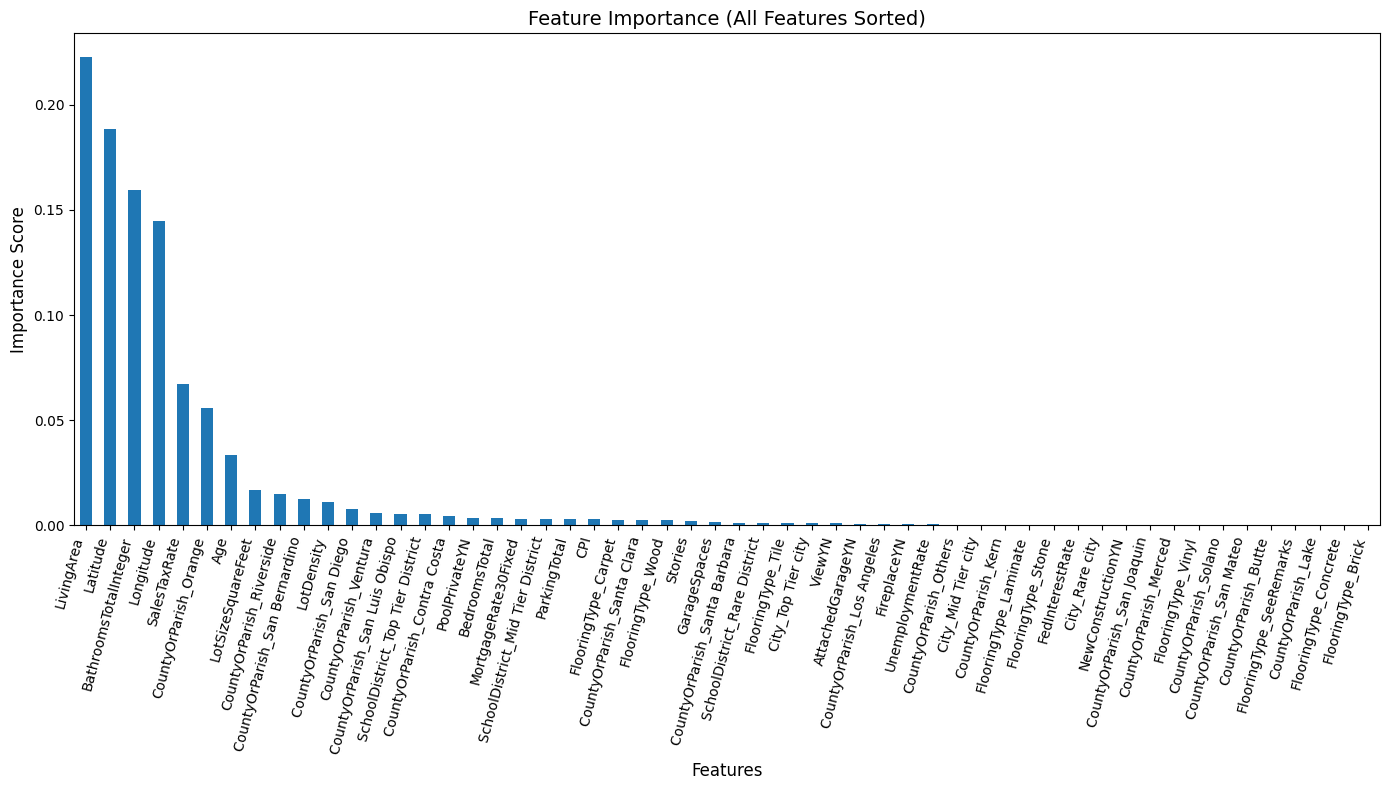

Dropped Features: ['AttachedGarageYN', 'CountyOrParish_Los Angeles', 'FireplaceYN', 'UnemploymentRate', 'CountyOrParish_Others', 'City_Mid Tier city', 'CountyOrParish_Kern', 'FlooringType_Laminate', 'FlooringType_Stone', 'FedInterestRate', 'City_Rare city', 'NewConstructionYN', 'CountyOrParish_San Joaquin', 'CountyOrParish_Merced', 'FlooringType_Vinyl', 'CountyOrParish_Solano', 'CountyOrParish_San Mateo', 'CountyOrParish_Butte', 'FlooringType_SeeRemarks', 'CountyOrParish_Lake', 'FlooringType_Concrete', 'FlooringType_Brick']


In [ ]:
#Call the feature importances value used from Random Forest Regressor with sorting it.
importances = pd.Series(rfr_cv.best_estimator_.feature_importances_, index=x_train.columns)
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 8))  # Larger size to fit all labels
importances.plot(kind='bar')

plt.title('Feature Importance (All Features Sorted)', fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.xticks(rotation=75, ha='right')  # rotate labels for readability
plt.tight_layout()
plt.show()

# Set threshold
threshold = 0.001

# Identify low-importance features
low_importance_features = importances[importances < threshold].index.tolist()

# Drop them from your training and testing sets
x_train_reduced = x_train.drop(columns=low_importance_features)
x_test_reduced = x_test.drop(columns=low_importance_features)

#Show what we dropped the features that has low importances
print("Dropped Features:", low_importance_features)

Using the threshold 0.001, we dropped the features of **'UnemploymentRate', 'FireplaceYN', 'CountyOrParish_Los Angeles', 'CountyOrParish_Others', 'FlooringType_Laminate', 'FlooringType_Stone', 'CountyOrParish_Kern', 'FedInterestRate', 'City_Mid Tier city', 'City_Rare city', 'NewConstructionYN', 'FlooringType_Vinyl', 'CountyOrParish_San Joaquin', 'CountyOrParish_Lake', 'CountyOrParish_Merced', 'CountyOrParish_San Mateo', 'CountyOrParish_Solano', 'FlooringType_SeeRemarks', 'FlooringType_Brick', 'FlooringType_Concrete', 'CountyOrParish_Butte'**. We will re-train and re-evaluate the model and see if it improves.

In [ ]:
#Train and apply K-Fold to RandomSearch Cross-Validation with scoring MAPE
rfr_cv=RandomizedSearchCV(estimator=rfr, param_distributions=param, n_iter=15, cv=kf,scoring=mape_score, n_jobs=-1)
rfr_cv.fit(x_train_reduced, y_train)

all_mean_neg2 = rfr_cv.cv_results_['mean_test_score']
mean_mape2 = -np.mean(all_mean_neg2)
std2 = np.std(-all_mean_neg2, ddof=1)

#Call the best parameter
best_param=rfr_cv.best_params_
print("Best Parameters", best_param)

#Call Random Forest Regressor only using good importances values
final_model = RandomForestRegressor(**best_param, random_state=50)
final_model.fit(x_train_reduced, y_train)

y_pred_train = final_model.predict(x_train_reduced)
y_pred_test = final_model.predict(x_test_reduced)

print("Mean Mape:", mean_mape2)
print("Reduced std:", std2)
print()
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Train R2 score:", r2_score(y_train, y_pred_train))
print("Train MAPE:" , mean_absolute_percentage_error(y_train, y_pred_train)*100,"%")
print()
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test R2 score:", r2_score(y_test, y_pred_test))
print("Test MAPE:" , mean_absolute_percentage_error(y_test, y_pred_test)*100,"%")

Best Parameters {'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 104}
Mean Mape: 0.2000148136603272
Reduced std: 0.11331673702763079

Train MAE: 78917.94872834065
Train R2 score: 0.9532849967384572
Train MAPE: 7.511287627952472 %

Test MAE: 139236.76118405053
Test R2 score: 0.8626529813822894
Test MAPE: 12.46743983295847 %


After training a Random Forest price model, I used the model’s feature importances to remove low-impact predictors and retrained the model on the reduced feature set. I then performed hyperparameter tuning with RandomizedSearchCV using 5-fold cross-validation, optimizing for MAPE, and selected the best configuration **(104 trees, max depth 19, min samples split 5, min samples leaf 3)**. The tuned reduced-feature model achieved R² ≈ 0.863 and MAPE ≈ 12.47% on the test set **(MAE ≈ $139k)**, while training performance was higher **(R^2 = 0.953, MAPE = 7.51%)**, showing a normal train–test gap but stable generalization.

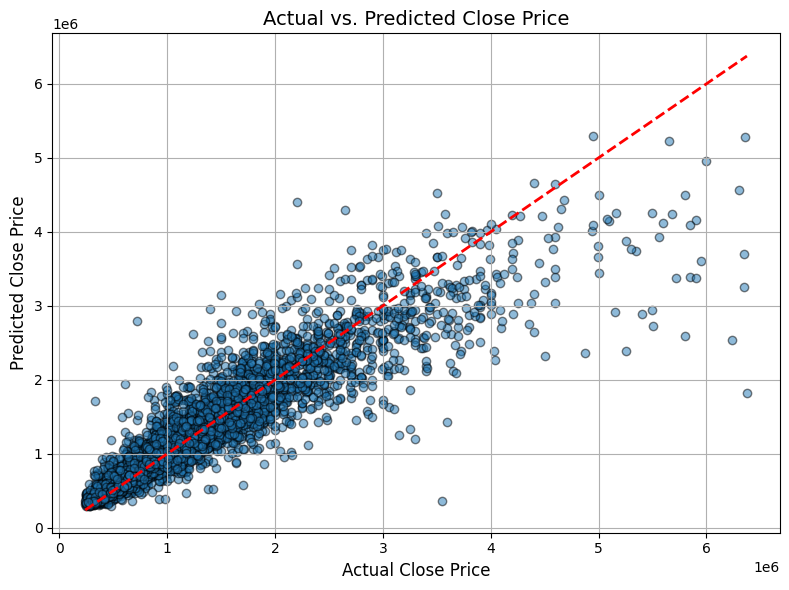

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.title("Actual vs. Predicted Close Price", fontsize=14)
plt.xlabel("Actual Close Price", fontsize=12)
plt.ylabel("Predicted Close Price", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Visualized model performance with an Actual vs. Predicted scatter plot and a 45° reference line. Results show predictions generally track true prices, with larger errors at higher price ranges and a few outliers.

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': np.float64(0.8869894380482674), 'learning_rate': np.float64(0.13272450621316229), 'max_depth': 9, 'n_estimators': 200, 'subsample': np.float64(0.9006523757990821)}
Test MAPE: 0.1203
Test R² Score: 0.8789


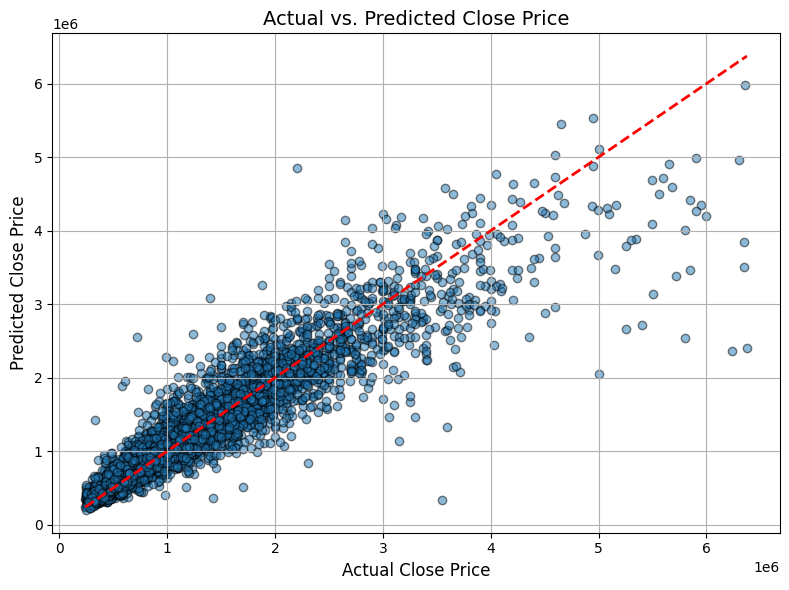

In [ ]:

param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.05, 0.25),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Call XGBoost model
xgb = XGBRegressor(random_state=42)

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=30, scoring='neg_mean_absolute_percentage_error', cv=5,verbose=1, n_jobs=-1, random_state=42)

#Fit the model
random_search.fit(x_train_reduced, y_train)

#Evaluate best model
best_param = random_search.best_estimator_

best_model = XGBRegressor(**best_param.get_params())
best_model.fit(x_train_reduced, y_train)

y_pred = best_model.predict(x_test_reduced)

mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print(f"Test MAPE: {mape:.4f}")
print(f"Test R² Score: {r2:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)

plt.title("Actual vs. Predicted Close Price", fontsize=14)
plt.xlabel("Actual Close Price", fontsize=12)
plt.ylabel("Predicted Close Price", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

I trained an XGBoost regression model to predict property close prices and tuned hyperparameters using RandomizedSearchCV with 5-fold cross-validation, optimizing for MAPE. The best configuration **(200 trees, depth 9, learning rate ~0.133, subsample ~0.901, colsample_bytree ~0.887)** achieved **MAPE = 12.0% and R^2 = 0.879** on a held-out test set. Compared to my tuned Random Forest regressor **(MAPE = 12.5%, R^2 = 0.863)**, XGBoost provided a modest improvement in both error and overall fit. I also visualized performance using an Actual vs. Predicted scatter plot with a 45° reference line, showing predictions generally track true prices with larger errors at higher price ranges.

## Conclusion



- Built a price prediction pipeline and compared tree based models using XGBoost performed best on the test set **(MAPE 12%, R^2 = 0.879)**, slightly beating your tuned Random Forest **(MAPE = 12.5%, R^2 = 0.863)**.

- The "Actual vs Predicted" plot shows the model tracks the general trend well, but errors grow for high-price homes.



## Limitation

- MAPE can be unstable when actual prices are small (it can blow up) and it tends to overweight low-price errors.

- High-price predictions are less reliable and often cuased by fewer expensive examples and more unique features not captured

- Missing important signals: property price is heavily affected by things you may not have such as location detail, neighborhood quality, renovation/condition, year build, lot shape, market, or facility.

- Feature importance from trees can be biased and it does not always mean as real world importance.

## Next improvements

- Include engineered features such as price per sqft, interaction terms like beds and sqft, or log transformation of closed price.

- Use better location signals using zipcode or neighborhood, distance to city center, or cluster by coordinates.

- Try preicting log of closed price and then convert back to real closed price for improving stability and reduces geteroscedastic errors.

- Expend XGBoost tuning using min_child_weight, reg_alpha, or gamma for improving the models.